In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [2]:
from data_structures.trees import *
from utilities.drawing import draw_tree
from data_structures.cfr_trees import CFRTree, CFRJointStrategy
from cfr_code.reconstruction_cfr import SolveWithReconstructionCFR
from cfr_code.sample_cfr import SolveWithSampleCFR
from cfr_code.cfr import SolveWithCFR
import ast
from utilities.graphs import epsilon_graph, comparative_epsilon_graph

In [3]:
%load_ext autoreload
%autoreload 2

# Coordination game

In [4]:
coordination_tree = Tree()

In [6]:
n1 = coordination_tree.addNode(1, 1, coordination_tree.root)
n2 = coordination_tree.addNode(1, 1, coordination_tree.root)

In [8]:
coordination_tree.addLeaf(n1, [1, 1])
coordination_tree.addLeaf(n1, [0, 0])
coordination_tree.addLeaf(n2, [0, 0])
coordination_tree.addLeaf(n2, [1, 1])

Leaf6 (children of Node2 via Action 1.1) -  utility is [1, 1]

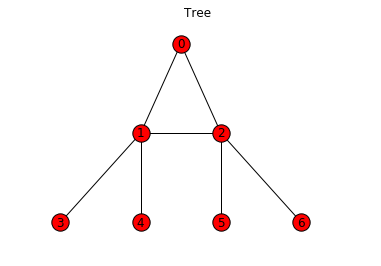

In [10]:
draw_tree(coordination_tree)

In [30]:
coord_res = []
ct = CFRTree(coordination_tree)
coord_res.append(SolveWithReconstructionCFR(ct, iterations = 100, reconstructEveryIteration = 1,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 1))
ct = CFRTree(coordination_tree)
coord_res.append(SolveWithSampleCFR(ct, iterations = 100, checkEveryIteration = 1))
ct = CFRTree(coordination_tree)
coord_res.append(SolveWithCFR(ct, iterations = 100, checkEveryIteration = 1))

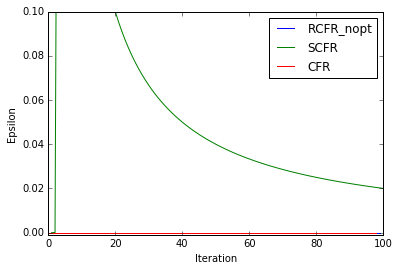

In [31]:
comparative_epsilon_graph(coord_res, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (-0.001, 0.1))

# Permutation game

In [33]:
permutation_tree = Tree(3)

In [34]:
n1 = permutation_tree.addNode(1, 1, permutation_tree.root)
n2 = permutation_tree.addNode(2, 2, n1)
n3 = permutation_tree.addNode(2, 2, n1)

n4 = permutation_tree.addNode(2, 2, permutation_tree.root)
n5 = permutation_tree.addNode(1, 1, n4)
n6 = permutation_tree.addNode(1, 1, n4)

In [37]:
permutation_tree.addLeaf(n2, [-2, -2, -2])
permutation_tree.addLeaf(n2, [0, 0, 0])
permutation_tree.addLeaf(n3, [2, 2, 2])
permutation_tree.addLeaf(n3, [0, 0, 0])
permutation_tree.addLeaf(n5, [0, 0, 0])
permutation_tree.addLeaf(n5, [2, 2, 2])
permutation_tree.addLeaf(n6, [0, 0, 0])
permutation_tree.addLeaf(n6, [-2, -2, -2])

Leaf14 (children of Node6 via Action 1.1) -  utility is [-2, -2, -2]

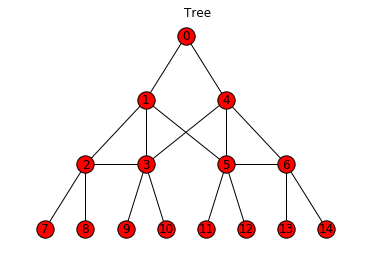

In [38]:
draw_tree(permutation_tree)

In [39]:
perm_res = []
ct = CFRTree(permutation_tree)
perm_res.append(SolveWithReconstructionCFR(ct, iterations = 100, reconstructEveryIteration = 1,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 1))
ct = CFRTree(permutation_tree)
perm_res.append(SolveWithSampleCFR(ct, iterations = 100, checkEveryIteration = 1))
ct = CFRTree(permutation_tree)
perm_res.append(SolveWithCFR(ct, iterations = 100, checkEveryIteration = 1))

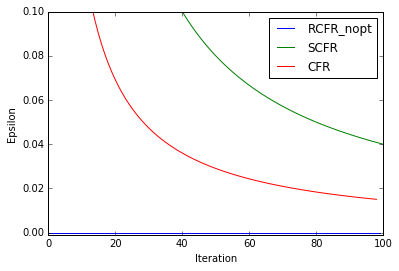

In [40]:
comparative_epsilon_graph(perm_res, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (-0.001, 0.1))

In [41]:
from games.permutation import *

In [142]:
big_perm_tree = build_permutation_game_tree(5, 2, None)

In [143]:
print("Size = " + str(big_perm_tree.node_count) + " nodes")

Size = 7646 nodes


In [144]:
big_perm_res = []
ct = CFRTree(big_perm_tree)
big_perm_res.append(SolveWithReconstructionCFR(ct, iterations = 200, reconstructEveryIteration = 5,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 5,
                                 show_perc = True))
ct = CFRTree(big_perm_tree)
big_perm_res.append(SolveWithSampleCFR(ct, iterations = 200, checkEveryIteration = 5, show_perc = True))
ct = CFRTree(big_perm_tree)
big_perm_res.append(SolveWithCFR(ct, iterations = 200, checkEveryIteration = 5, show_perc = True))

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%


In [156]:
ct = CFRTree(big_perm_tree)
big_perm_res[1] = SolveWithSampleCFR(ct, iterations = 200, checkEveryIteration = 5, show_perc = True)
ct = CFRTree(big_perm_tree)
big_perm_res[2] = SolveWithCFR(ct, iterations = 200, checkEveryIteration = 5, show_perc = True)

10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%


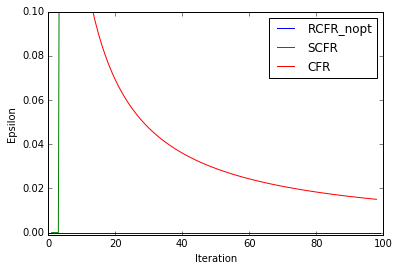

In [141]:
comparative_epsilon_graph(big_perm_res, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (-0.001, 0.1))

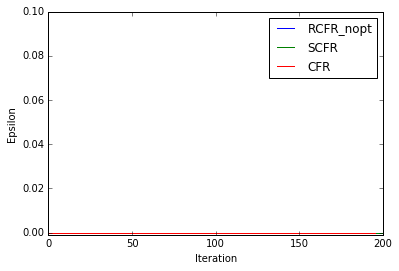

In [157]:
comparative_epsilon_graph(big_perm_res, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (-0.001, 0.1))

In [ ]:
# TODO: check code that calculates epsilon for > 3 players